# - Overview:
> The dataset (Space_Corrected.csv from https://www.kaggle.com/agirlcoding/all-space-missions-from-1957) includes all the space missions since the beginning of Space Race (1957). 
> It contains 9 rows and 4323 observations  which are:
>
> - **Unnamed 0:** Column number.
> - **Unnamed 0.1:** Column number.
> - **Company Name.**
> - **Location:** Location of the Launch.
> - **Datum:** Datum and Time of Launch.
> - **Detail:** Rocket Name.
> - **Status Rocket:** Status of the rocket.
> - **Rocket:** Cost of the mission: in $ million.
> - **Status Mission:** Status of the mission whether it is successful or not.


# - Objective:
> Find out the "next mission status" for a specific "company", wheter it is going to be successful or not.

# - Tools:
> - numpy. 
> - pandas.
> - matplotlib.pyplot.
> - seaborn.
> - sklearn.

# Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset

In [2]:
df = pd.read_csv('Space_Corrected.csv')
df2 = df.copy()
df2.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Step 2: Clean Dataset

In [3]:
df2 = df2.drop(['Unnamed: 0', 'Unnamed: 0.1'] , axis=1)
df2.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df2.columns = df2.columns.str.strip().str.replace(' ', '_').str.lower()
df2.columns

Index(['company_name', 'location', 'datum', 'detail', 'status_rocket',
       'rocket', 'status_mission'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [6]:
#Split datum to parts
df2['date_time'] = pd.to_datetime(df2.datum)

df2['day'] = df2.date_time.apply(lambda datetime: datetime.day)
df2['month'] = df2.date_time.apply(lambda datetime: datetime.month)
df2['year'] = df2.date_time.apply(lambda datetime: datetime.year)

df2['country'] = df2.location.apply(lambda location: location.split(", ")[-1])

df2.head()

,company_name,location,datum,detail,status_rocket,rocket,status_mission,date_time,day,month,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,7,8,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,6,8,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,4,8,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,30,7,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,30,7,2020,USA


In [7]:
df2.shape

(4324, 12)

In [8]:
#Check Types
df2.dtypes

company_name      object
location          object
datum             object
detail            object
status_rocket     object
rocket            object
status_mission    object
date_time         object
day                int64
month              int64
year               int64
country           object
dtype: object

In [9]:
df2.rocket = pd.to_numeric(df2.rocket, errors = 'coerce')
df2.dtypes

company_name       object
location           object
datum              object
detail             object
status_rocket      object
rocket            float64
status_mission     object
date_time          object
day                 int64
month               int64
year                int64
country            object
dtype: object

In [10]:
df2.describe()

,rocket,day,month,year
count,949.000000,4324.000000,4324.000000,4324.000000
mean,129.795237,16.438945,6.754163,1987.386679
std,143.220323,8.636688,3.417027,18.072562
min,5.300000,1.000000,1.000000,1957.000000
25%,40.000000,9.000000,4.000000,1972.000000
50%,62.000000,17.000000,7.000000,1984.000000
75%,164.000000,24.000000,10.000000,2002.000000
max,450.000000,31.000000,12.000000,2020.000000


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_name    4324 non-null   object 
 1   location        4324 non-null   object 
 2   datum           4324 non-null   object 
 3   detail          4324 non-null   object 
 4   status_rocket   4324 non-null   object 
 5   rocket          949 non-null    float64
 6   status_mission  4324 non-null   object 
 7   date_time       4324 non-null   object 
 8   day             4324 non-null   int64  
 9   month           4324 non-null   int64  
 10  year            4324 non-null   int64  
 11  country         4324 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 405.5+ KB


In [12]:
#Check Missing 
df2.isna().sum()

company_name         0
location             0
datum                0
detail               0
status_rocket        0
rocket            3375
status_mission       0
date_time            0
day                  0
month                0
year                 0
country              0
dtype: int64

> Rocket column(cost of the mission) has many null values.

<AxesSubplot:>

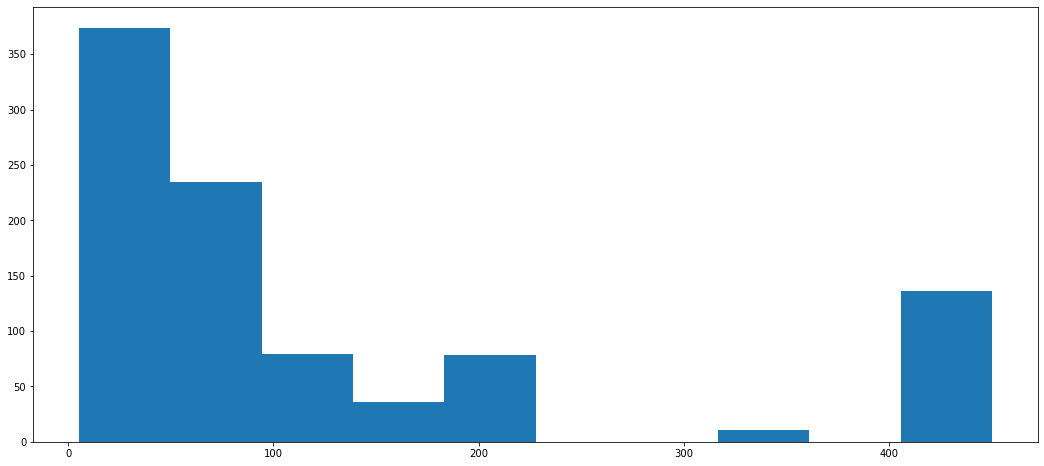

In [13]:
df2.rocket.hist(grid = False, figsize=(18,8))

In [14]:
df2.rocket.fillna(0.0, inplace = True)
df2.isna().sum()

company_name      0
location          0
datum             0
detail            0
status_rocket     0
rocket            0
status_mission    0
date_time         0
day               0
month             0
year              0
country           0
dtype: int64

In [15]:
#Double check for missing
df2.replace(['#', '*', 'NA', 'N/A', '?', ' ', np.nan], 0).isna().sum()
#df2.isna().sum()
df2.head()

,company_name,location,datum,detail,status_rocket,rocket,status_mission,date_time,day,month,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,7,8,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,6,8,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020-08-04 23:57:00+00:00,4,8,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,30,7,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,30,7,2020,USA


In [16]:
df2 = df2.drop_duplicates()
df2.duplicated().sum()

0

> There is one duplicate value.

# Step 3: EDA

   ## 1) Status Mission:

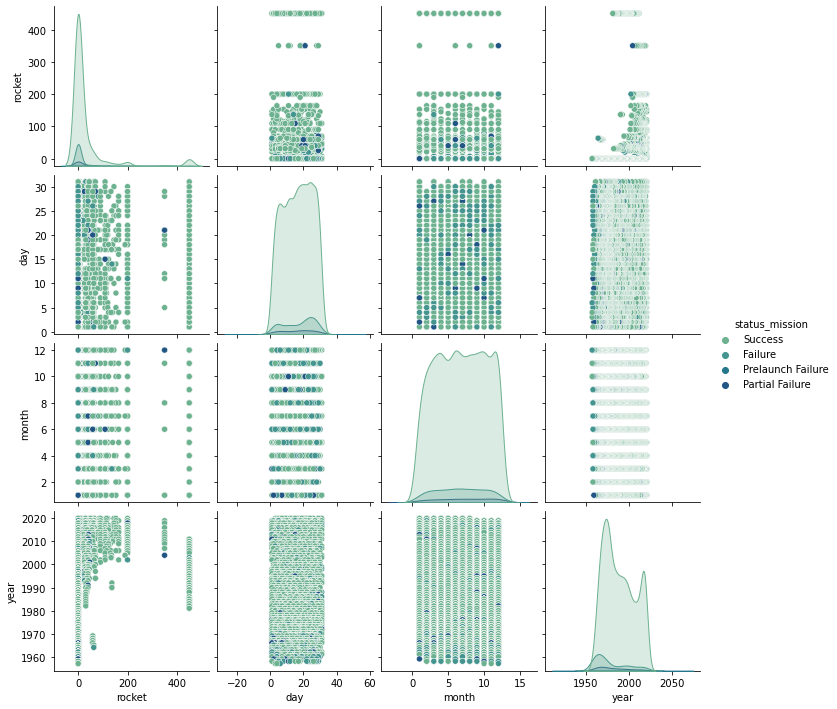

In [17]:
sns.pairplot(df2, diag_kind = 'kde', hue = 'status_mission', palette = 'crest')

> - What is the most common status for the overall launchs? 
>
>    The majority of mission status is 'Successful'

In [18]:
status_mission_count = df2.status_mission.value_counts().reset_index()
status_mission_count

,index,status_mission
0,Success,3878
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


Text(-1.6999999999999922, 0.5, 'Number of Launches')

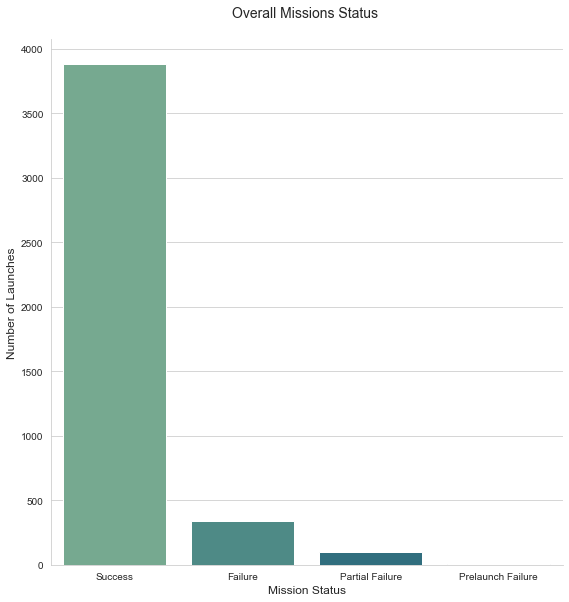

In [19]:
sns.set_style("whitegrid")

ax = sns.catplot(x = 'status_mission',
                data = df2,
                order = df2.status_mission.value_counts().index,
                kind ='count',
                height = 8,
                palette = 'crest')

plt.title("Overall Missions Status \n", size = 14)
plt.xlabel("Mission Status", size = 12)
plt.ylabel("Number of Launches", size = 12)

> - What is the percentage of each status?

Text(0.5, 1.0, 'Overall Missions Status Percentages')

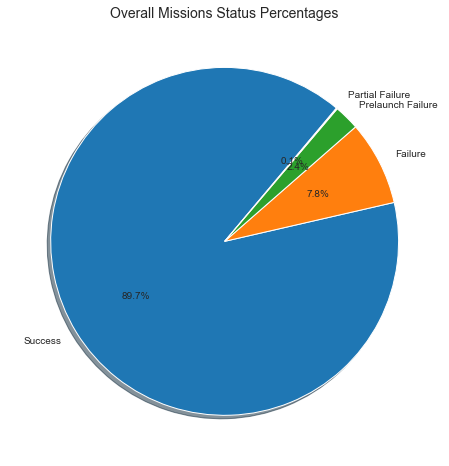

In [20]:
figure = plt.figure(figsize = (15,8))
sizes = df2.status_mission.value_counts()
plt.pie(sizes, 
        labels = df2.status_mission.unique(), 
        autopct = '%1.1f%%',
        shadow = True, 
        startangle = 50)

plt.title("Overall Missions Status Percentages", size = 14)

   ## 2) Company Name:

> - What is the company that launch the most? 

In [21]:
company_name_launches_count = df2.company_name.value_counts().reset_index()
company_name_launches_count

,index,company_name
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,250
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


Text(0, 0.5, 'Company Name')

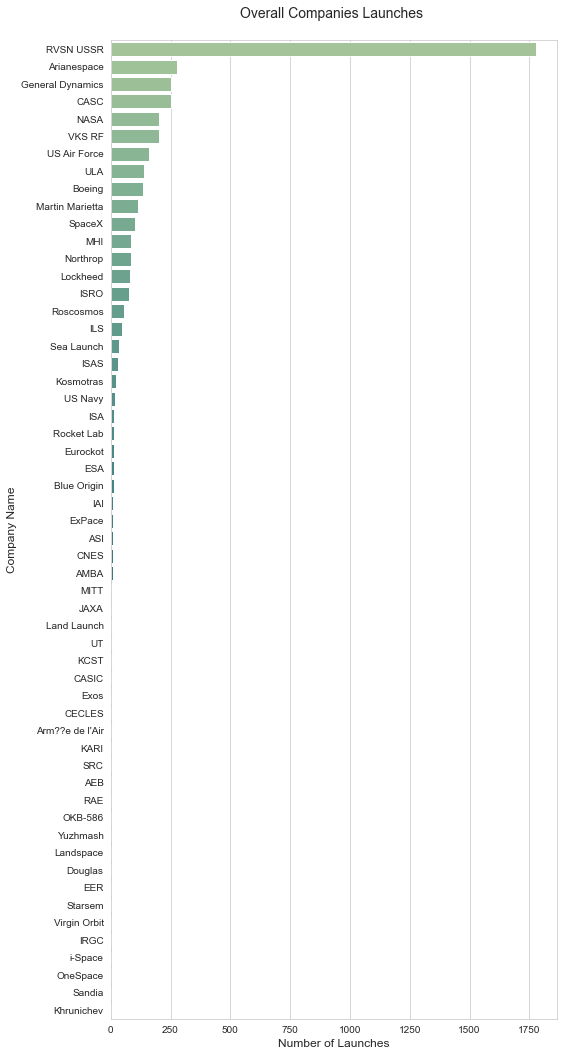

In [22]:
plt.figure(figsize=(8,18))
sns.countplot(y = 'company_name', 
              data = df2, 
              order = df2.company_name.value_counts().index,
              palette = 'crest')

plt.title("Overall Companies Launches \n", size = 14)
plt.xlabel("Number of Launches", size = 12)
plt.ylabel("Company Name", size = 12)

> - What are the status that each company went through?

Text(-61.69999999999999, 0.5, 'Company Name')

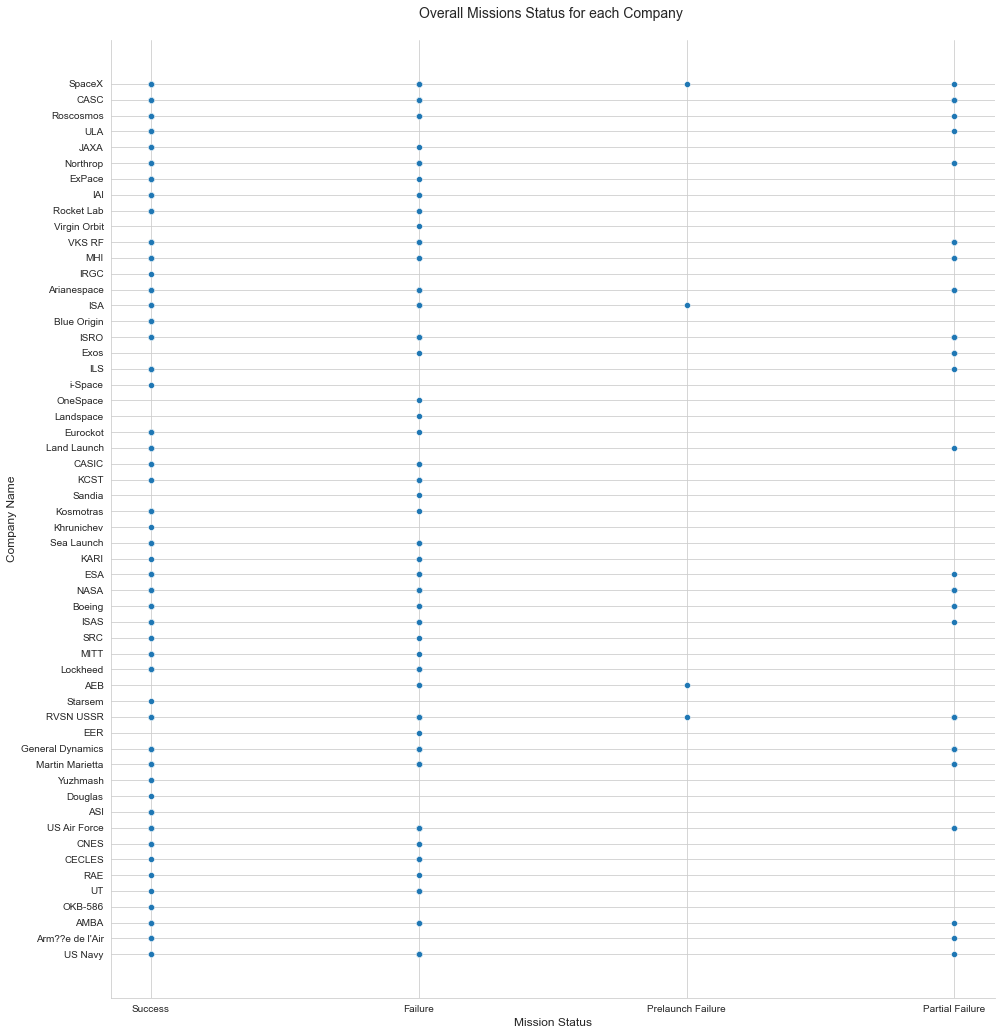

In [23]:
sns.relplot(x ='status_mission',
            y = 'company_name',
            data = df2, 
            height = 14,
            palette = 'crest')

plt.title("Overall Missions Status for each Company \n", size = 14)
plt.xlabel("Mission Status", size = 12)
plt.ylabel("Company Name", size = 12)

> - What is the sucess percentage for each company?

In [24]:
df2['success_launches'] = df2.status_mission.apply(lambda status_mission: status_mission == 'Success')
df2.success_launches = df2.success_launches.astype(int)
df2.head(2)

# 1: Success
# 0: Failure

,company_name,location,datum,detail,status_rocket,rocket,status_mission,date_time,day,month,year,country,success_launches
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,7,8,2020,USA,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,6,8,2020,China,1


In [25]:
success_missions_df = df2[df2['status_mission'] == 'Success']
company_success_launches_count = success_missions_df.company_name.value_counts().sum
#success_missions_df

#success_missions_df['average'] = company_success_launches_count / df.status_mission.value_counts().sum()
#success_missions_df['average'] = company_success_launches_count/company_name_launches_count
# success_missions_df..apply(lambda datetime: datetime.month)
#company_name_launches_count['overall'] = success_missions_df

Text(0, 0.5, 'Company Name')

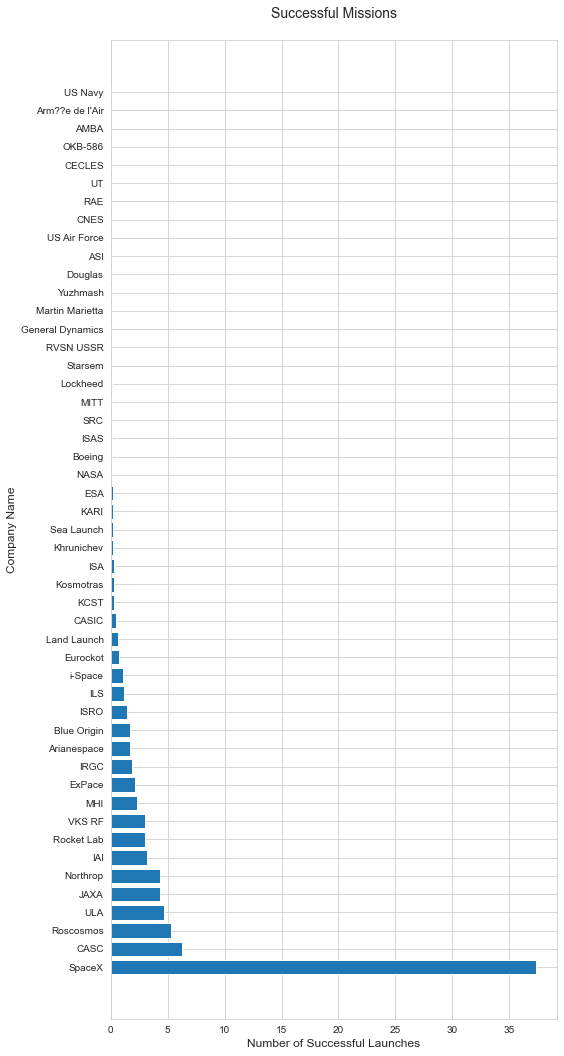

In [26]:
plt.figure(figsize=(8,18))
plt.barh(success_missions_df.company_name.unique(),
         success_missions_df.company_name.value_counts() / df2.status_mission.value_counts().sum() * 100)

plt.title("Successful Missions\n", size = 14)
plt.xlabel("Number of Successful Launches", size = 12)
plt.ylabel("Company Name", size = 12)

 ## 3) Country:

> - What are the status that each country went through?

Text(-108.82499999999999, 0.5, 'Country')

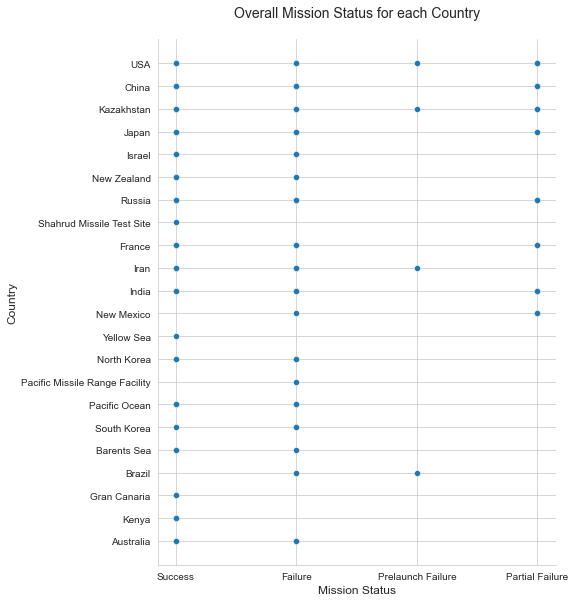

In [27]:
sns.relplot(x = 'status_mission',
            y = 'country',
            data = df2,
            height = 8,
            palette = 'crest')

plt.title("Overall Mission Status for each Country\n", size = 14)
plt.xlabel("Mission Status", size = 12)
plt.ylabel("Country", size = 12)

 ## 3) Datetime:

> - What year/month/day most launches happen in?

In [28]:
df2.year.value_counts().reset_index()

,index,year
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [29]:
df2.month.value_counts().reset_index()

,index,month
0,12,450
1,6,402
2,4,383
3,10,381
4,8,373
5,9,365
6,3,353
7,7,351
8,2,336
9,11,335


In [30]:
df2.day.value_counts().reset_index()

,index,day
0,28,187
1,25,175
2,24,173
3,21,167
4,12,163
5,22,158
6,20,155
7,18,154
8,5,153
9,27,152


<AxesSubplot:>

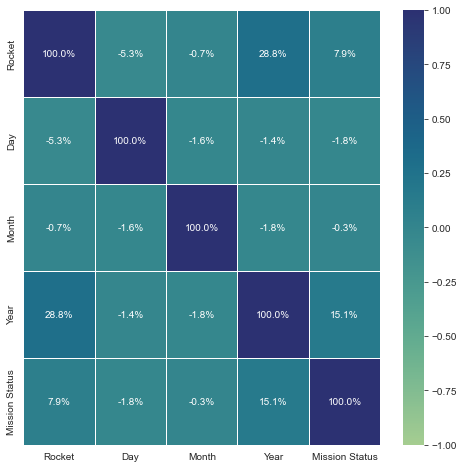

In [31]:
plt.figure(figsize = (8,8))
corr = df2.corr()
labels = ['Rocket', 'Day', 'Month', 'Year', 'Mission Status']
sns.heatmap(corr,
            cmap = 'crest',
            xticklabels = labels,
            yticklabels = labels,
            vmax = 1,
            vmin = -1, 
            annot = True,
            fmt = '.1%',
            linewidth = 0.5)

 ## 3) Rocket Status:

> Is the majority of the rockets still active?

In [32]:
df2.status_rocket.value_counts().reset_index()

,index,status_rocket
0,StatusRetired,3534
1,StatusActive,789


Text(0.5, 1.0, 'Rocket Status')

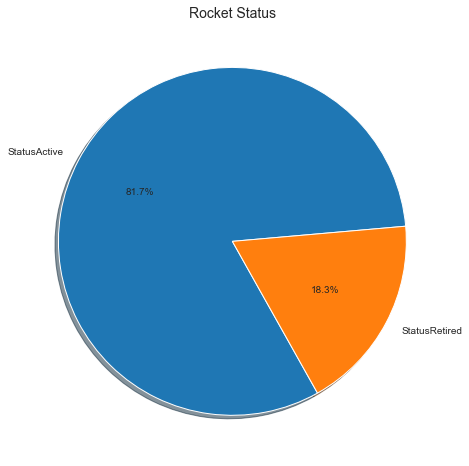

In [33]:
figure = plt.figure(figsize = (15,8))
sizes = df2.status_rocket.value_counts()
plt.pie(sizes, 
        labels = df2.status_rocket.unique(), 
        autopct = '%1.1f%%',
        shadow = True, 
        startangle = 5)

plt.title("Rocket Status", size = 14)

# Step 4: Modeling

# Step 4.1: Preprocessing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df2 = pd.get_dummies(df2)
df2.head()

,rocket,day,month,year,success_launches,company_name_AEB,company_name_AMBA,company_name_ASI,company_name_Arianespace,company_name_Arm??e de l'Air,...,country_New Mexico,country_New Zealand,country_North Korea,country_Pacific Missile Range Facility,country_Pacific Ocean,country_Russia,country_Shahrud Missile Test Site,country_South Korea,country_USA,country_Yellow Sea
0,50.00,7,8,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,29.75,6,8,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.00,4,8,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,65.00,30,7,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,145.00,30,7,2020,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# Create X & Y
X = df2.drop(columns = ['success_launches'], axis = 1)
y = df2.success_launches

In [37]:
#X = pd.get_dummies(X, drop_first = True)
#y = pd.get_dummies(y, drop_first = True)

#Split Data into Train vs Test:
X_train , X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = 42)

In [38]:
X_train.shape

(3026, 13141)

In [39]:
X_test.shape

(1297, 13141)

# Step 4.2: Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled.shape

(3026, 13141)

In [42]:
X_test_scaled.shape

(1297, 13141)

In [43]:
pd.DataFrame(X_train_scaled,columns = X_train.columns)

,rocket,day,month,year,company_name_AEB,company_name_AMBA,company_name_ASI,company_name_Arianespace,company_name_Arm??e de l'Air,company_name_Blue Origin,...,country_New Mexico,country_New Zealand,country_North Korea,country_Pacific Missile Range Facility,country_Pacific Ocean,country_Russia,country_Shahrud Missile Test Site,country_South Korea,country_USA,country_Yellow Sea
0,-0.329466,1.348785,0.372506,-0.333515,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,1.451474,-0.018182,-0.025717,-0.661977,-0.018182
1,-0.329466,1.233291,0.079345,-0.611690,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,1.451474,-0.018182,-0.025717,-0.661977,-0.018182
2,-0.329466,-1.192071,1.545148,-0.389150,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,-0.688955,-0.018182,-0.025717,1.510628,-0.018182
3,0.726198,0.078357,-0.506976,1.391166,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,-0.688955,-0.018182,-0.025717,-0.661977,-0.018182
4,0.949061,-0.383617,0.372506,1.502436,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,-0.688955,-0.018182,-0.025717,1.510628,-0.018182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,-0.329466,-1.076577,0.372506,-0.945499,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,1.451474,-0.018182,-0.025717,-0.661977,-0.018182
3022,2.016455,1.233291,-1.679618,1.613706,-0.025717,-0.044573,-0.040683,3.820725,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,-0.688955,-0.018182,-0.025717,-0.661977,-0.018182
3023,-0.329466,-1.654045,1.251987,-0.778594,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,1.451474,-0.018182,-0.025717,-0.661977,-0.018182
3024,-0.329466,-0.037137,-0.506976,-1.112404,-0.025717,-0.044573,-0.040683,-0.261730,-0.031502,-0.051486,...,-0.031502,-0.048152,-0.031502,-0.018182,-0.101738,-0.688955,-0.018182,-0.025717,-0.661977,-0.018182


# Step 4.3: Different Models

# 1. Logistc Regression

In [44]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

y_logistic_model_predict = logistic_model.predict(X_test_scaled) 
y_logistic_model_predict

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
round(logistic_model.score(X_train_scaled, y_train) * 100)

100

# 2. KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled, y_train)

y_knn_model_prediction = knn_model.predict(X_test_scaled)
y_knn_model_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
round(metrics.accuracy_score(y_test, y_knn_model_prediction) * 100)

91

# 3. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled,y_train)

y_random_forest_model_prediction = random_forest_model.predict(X_test_scaled)
y_random_forest_model_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
round(metrics.accuracy_score(y_test, y_random_forest_model_prediction) * 100)

100

# Step 4.4: Model evalution

In [50]:
from sklearn.metrics import classification_report

> 1) Logistc Regression

In [51]:
print(classification_report(y_logistic_model_predict,y_test))

              precision    recall  f1-score   support

           0       0.11      1.00      0.20        14
           1       1.00      0.92      0.96      1283

    accuracy                           0.92      1297
   macro avg       0.56      0.96      0.58      1297
weighted avg       0.99      0.92      0.95      1297



> 2) KNN Classifier

In [52]:
print(classification_report(y_knn_model_prediction,y_test))

              precision    recall  f1-score   support

           0       0.04      0.83      0.08         6
           1       1.00      0.91      0.95      1291

    accuracy                           0.91      1297
   macro avg       0.52      0.87      0.51      1297
weighted avg       0.99      0.91      0.95      1297



> 3) Random Forest Classifier

In [53]:
print(classification_report(y_random_forest_model_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00      1174

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297



# Step 5: Conclusion

>  1) **The logistic regression score** = 100% 
>  
>  2) **KNN Classifier score** = 91%
>  
>  3) **Random Forest Classifier** = 100%
